In [ ]:
!unzip dataset_with_mask_1.zip

Archive:  dataset_with_mask_1.zip
   creating: dataset_with_mask/
   creating: dataset_with_mask/omkar/
  inflating: dataset_with_mask/omkar/pic_62.png  
  inflating: dataset_with_mask/omkar/pic_83.png  
  inflating: dataset_with_mask/omkar/pic_88.png  
  inflating: dataset_with_mask/omkar/pic_65.png  
  inflating: dataset_with_mask/omkar/pic_98.png  
  inflating: dataset_with_mask/omkar/pic_84.png  
  inflating: dataset_with_mask/omkar/pic_99.png  
  inflating: dataset_with_mask/omkar/pic_72.png  
  inflating: dataset_with_mask/omkar/pic_56.png  
  inflating: dataset_with_mask/omkar/pic_69.png  
  inflating: dataset_with_mask/omkar/pic_51.png  
  inflating: dataset_with_mask/omkar/pic_79.png  
  inflating: dataset_with_mask/omkar/pic_96.png  
  inflating: dataset_with_mask/omkar/pic_55.png  
  inflating: dataset_with_mask/omkar/pic_93.png  
  inflating: dataset_with_mask/omkar/pic_89.png  
  inflating: dataset_with_mask/omkar/pic_81.png  
  inflating: dataset_with_mask/omkar/pic_77.pn

In [ ]:
!cd ..

In [ ]:
!rm -rf dataset_with_mask

In [ ]:
!rm -rf models

In [ ]:
!pwd

/content


In [ ]:
import torch
import os
import numpy as np
from fastai.vision import *
from fastai.metrics import error_rate,accuracy
from tqdm import tqdm
import cv2
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
torch.device('cuda')
torch.cuda.empty_cache()

# imagePaths = []

dataset_path = 'dataset_with_mask'

In [ ]:
!pwd

/content


In [ ]:
np.random.seed(42)

trfm = get_transforms(do_flip=True, flip_vert=True, max_zoom=1.2, max_rotate=20.0, max_lighting=0.4)

data = ImageDataBunch.from_folder(dataset_path,train='.',valid_pct =0.2,num_workers = 4,bs=16).normalize(imagenet_stats)
# ,ds_tfms = trfm


learn = cnn_learner(data,models.vgg16_bn,metrics = [error_rate,accuracy,FBeta(beta=1, average='macro')],callback_fns=ShowGraph)

data.classes

['angela_merkel',
 'anushka_sharma',
 'donald_trump',
 'narendra_modi',
 'omkar',
 'salman_khan',
 'shushant_singh_rajput',
 'vladimir_putin']

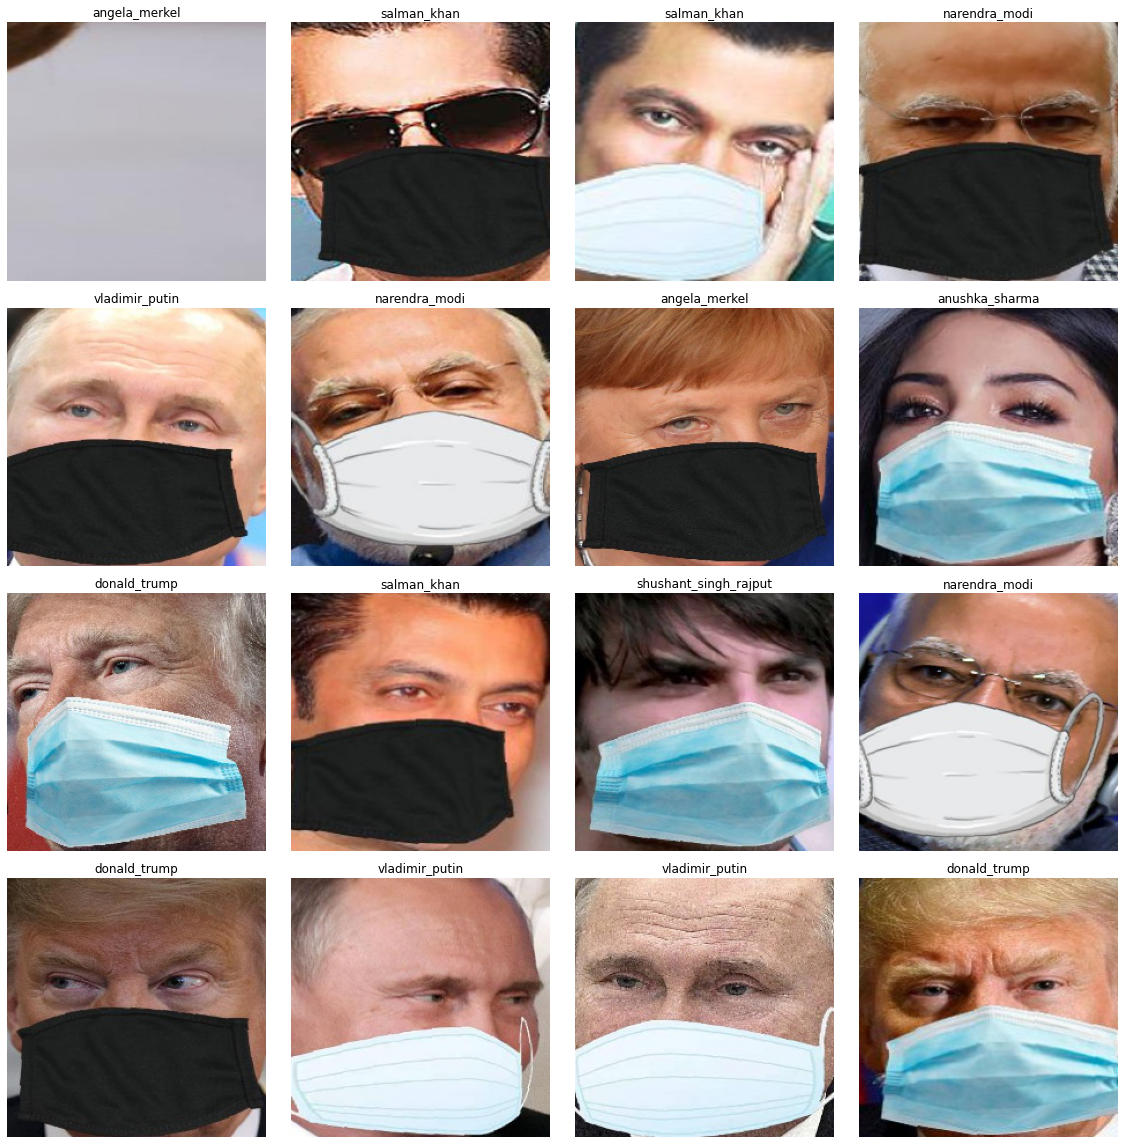

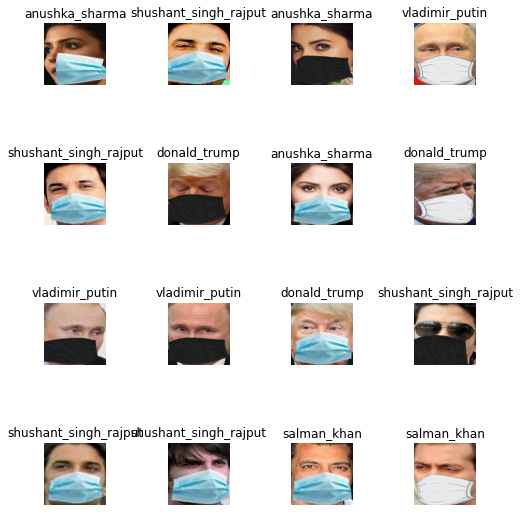

In [ ]:
data.show_batch(rows=5,figsize=(7,8))

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,2.961303,1.249556,0.394231,0.605769,0.557632,00:03
1,1.804114,0.440054,0.153846,0.846154,0.843895,00:03
2,1.116464,0.282980,0.086538,0.913462,0.914969,00:03
3,0.729507,0.283524,0.076923,0.923077,0.923746,00:03
4,0.485085,0.251869,0.096154,0.903846,0.909190,00:03
5,0.368013,0.251965,0.096154,0.903846,0.909190,00:03


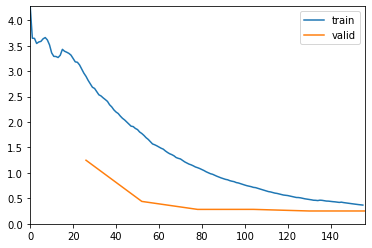

In [ ]:

learn.fit_one_cycle(6, max_lr =[1e-6, 1e-4, 1e-3])
# , max_lr =[1e-6, 1e-4, 1e-3]
learn.save('vgg16_bn') 



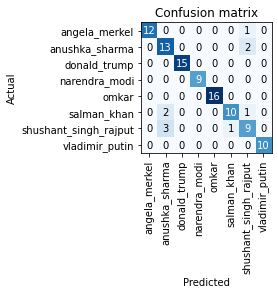

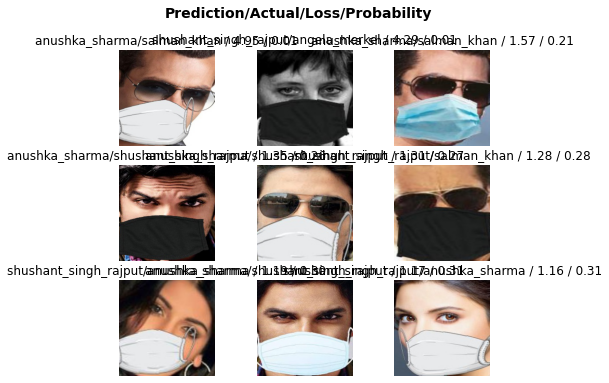

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

# interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix()
interp.plot_top_losses(9, figsize=(7,6))

In [ ]:
learn.ten

(Category tensor(5),
 tensor(5),
 tensor([0.1356, 0.0364, 0.0760, 0.2199, 0.0896, 0.3212, 0.1212]))

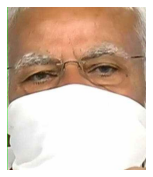

In [ ]:
img = open_image('photo.jpg')
# (image.jpg is any random image.)
img.show(figsize=(3, 3))

learn.predict(img)


In [ ]:
learn.export()

In [ ]:
src = "dataset_with_mask/models/"
dest = "models"
shutil.copytree(src,dest)
src = "dataset_with_mask/export.pkl"
dest = "."
shutil.copy(src,dest)

'./export.pkl'

In [ ]:
for i in os.listdir('dataset_with_mask/models'):
    os.remove(f'dataset_with_mask/models/{i}')
os.rmdir('dataset_with_mask/models')

In [ ]:
os.remove('dataset_with_mask/export.pkl')

In [ ]:
learn = load_learner(".")

In [ ]:
classNames = ['angela_markel','anushka_sharma','donald_trump','narendra_modi','omkar',"salman_khan",'shushant_singh_rajput',"valdimir_putin"]
classNames

['angela_markel',
 'anushka_sharma',
 'donald_trump',
 'narendra_modi',
 'omkar',
 'salman_khan',
 'shushant_singh_rajput',
 'valdimir_putin']

Category tensor(5)

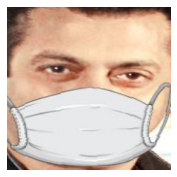

In [ ]:
img = open_image('00000066.jpg')
# (image.jpg is any random image.)
img.show(figsize=(3, 3))
pred_class,preds_idx,outputs = learn.predict(img)
pred_class
# learn.predict(dataset_with_mask_face/ellie_satler/00000006.jpg)

In [ ]:
classNames[preds_idx]

'salman_khan'

Category tensor(4)

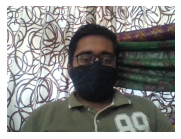

In [ ]:
img = open_image('pic_99.png')
# (image.jpg is any random image.)
img.show(figsize=(3, 3))
pred_class,preds_idx,outputs = learn.predict(img)
pred_class
# learn.predict(dataset_with_mask_face/ellie_satler/00000006.jpg)

In [ ]:
classNames[preds_idx]

'omkar'